In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
#outliars are dangerous in predictive model

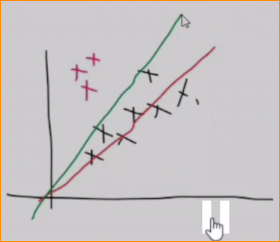

In [6]:
# if we have outliars in data then regression line will shift to accomodate outliars
# and will not generate correct predictions

## price

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price', ylabel='Density'>

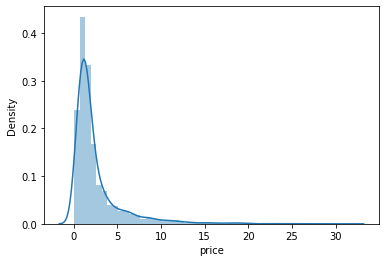

In [7]:
sns.distplot(df['price'])

In [8]:
#by checking the distribution, it clearly shows its not normal
#so we'll plot boxplot to check outliars in data

<AxesSubplot:xlabel='price'>

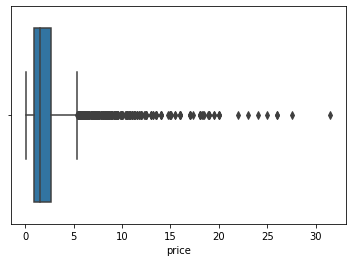

In [9]:
sns.boxplot(x=df['price'])

In [10]:
#according to bxplot, any point below lower bound &
# outside upper bound is considered as outliar
# so when extrected those rows which are outliars
# it was 425 rows like below:

# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2765,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2096,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
874,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153


In [12]:
outliers.to_csv('outliers.csv', index=False)

In [13]:
#on the basis of price, there are some genuine outliars but there are some data errors as well

## price per sqft

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\575062949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


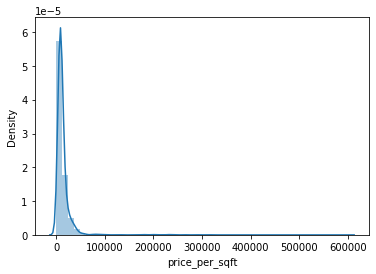

In [14]:
sns.distplot(df['price_per_sqft'])
plt.show()

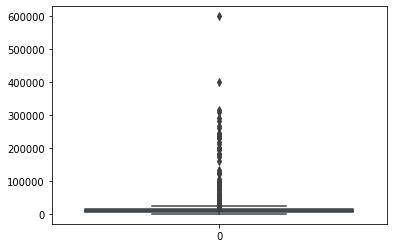

In [15]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [16]:
#price per sqft also shows lot of outliars.. this could be data issue

In [17]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(367,
 count       367.000000
 mean      52115.435967
 std       60746.225927
 min       24202.000000
 25%       27778.000000
 50%       33333.000000
 75%       41790.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [18]:
outliers_sqft.to_csv('outliars_price.csv')

In [19]:
#there is an issue with total_area, its in sq yard whereveer its 
#less then 1000 & not in sqft thats causing issue

In [20]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [21]:
#recalculating price per sqft
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\4252498893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [22]:
#now it has improved
outliers_sqft['price_per_sqft'].describe()

count      367.000000
mean     29160.735695
std      12308.413881
min       2689.000000
25%      25051.500000
50%      29630.000000
75%      35489.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [23]:
df.update(outliers_sqft)

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

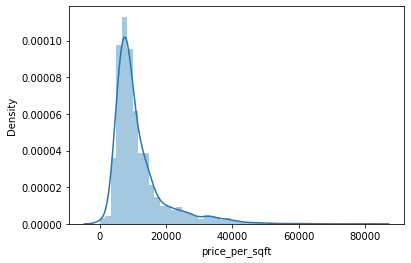

In [24]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

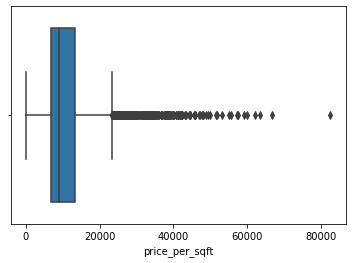

In [25]:
sns.boxplot(x=df['price_per_sqft'])

In [26]:
#checking value > 50000
df[df['price_per_sqft']>50000].shape

(13, 23)

In [27]:
#we'll remove these 13 values
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

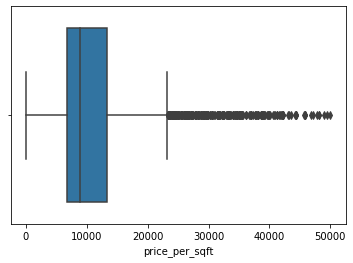

In [28]:
sns.boxplot(x=df['price_per_sqft'])

In [29]:
#there are still some outliars but the range is less then 50000

## area

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

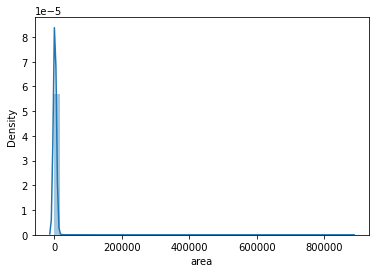

In [30]:
sns.distplot(df['area'])

<AxesSubplot:>

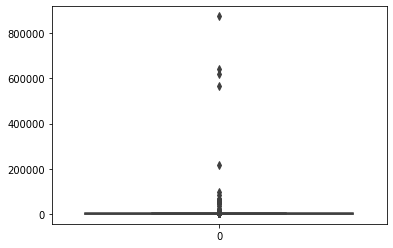

In [31]:
sns.boxplot(df['area'])

In [32]:
#there are some flats where area value is more the 9lakh sqft
#lets investigate

In [33]:
df['area'].describe()

count      3772.00000
mean       2906.69035
std       22822.30511
min         145.00000
25%        1257.75000
50%        1745.00000
75%        2340.00000
max      875000.00000
Name: area, dtype: float64

In [34]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [35]:
#there are clearely some mistake bcoz prices in comparisn to the area is very less
#we will remove these values

In [36]:
df = df[df['area'] < 100000]

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

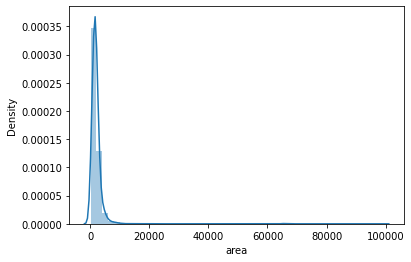

In [37]:
sns.distplot(df['area'])

<AxesSubplot:>

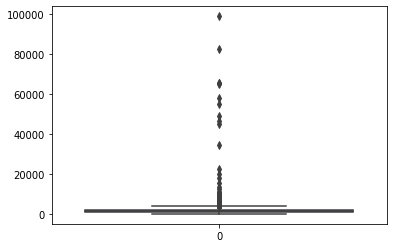

In [38]:
sns.boxplot(df['area'])

In [39]:
#since 10k sqft is also very big so lets filter them & check
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [40]:
#there are some data entry issue so we'll remove those.
#818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

In [41]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [42]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
2131,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
3088,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3444,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2342,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [43]:
#rest of these are correct as they are genuine outliars

In [44]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='area', ylabel='Density'>

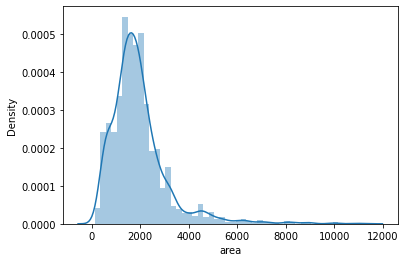

In [45]:
sns.distplot(df['area'])

<AxesSubplot:>

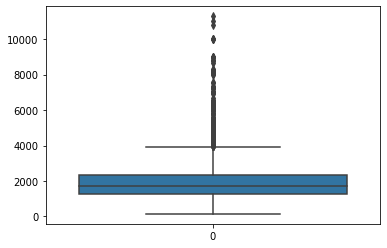

In [46]:
sns.boxplot(df['area'])

In [47]:
#this is the final image of data distribution

In [48]:
df['area'].describe()

count     3758.000000
mean      1942.345663
std       1213.681158
min        145.000000
25%       1250.250000
50%       1742.500000
75%       2317.250000
max      11286.000000
Name: area, dtype: float64

## bedroom

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

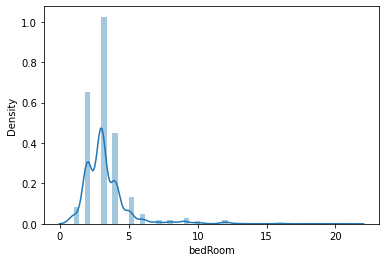

In [49]:
sns.distplot(df['bedRoom'])

<AxesSubplot:>

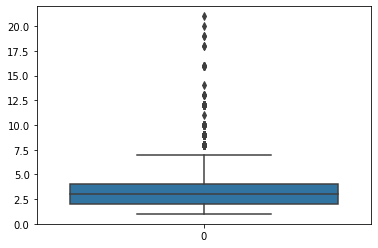

In [50]:
sns.boxplot(df['bedRoom'])

In [51]:
df['bedRoom'].describe()

count    3758.000000
mean        3.311868
std         1.810161
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [52]:
df[df['bedRoom']>10].shape

(45, 23)

In [53]:
#removing houses having 10+ bedrooms
df = df[df['bedRoom']<10]

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

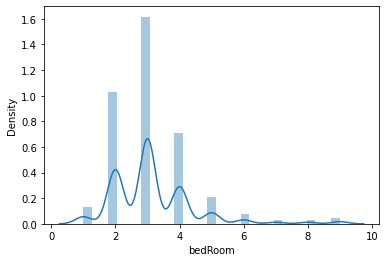

In [54]:
sns.distplot(df['bedRoom'])

<AxesSubplot:>

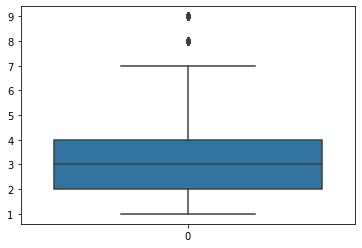

In [55]:
sns.boxplot(df['bedRoom'])

In [56]:
df.shape

(3693, 23)

### bathroom

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

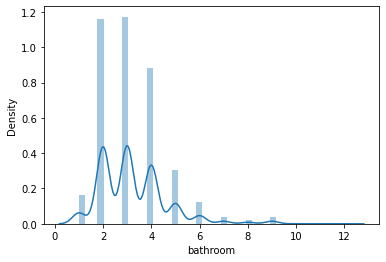

In [57]:
sns.distplot(df['bathroom'])

<AxesSubplot:>

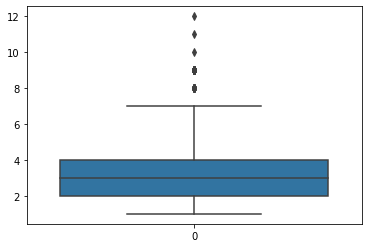

In [58]:
sns.boxplot(df['bathroom'])

In [59]:
df['bathroom'].describe()

count    3693.000000
mean        3.231519
std         1.396584
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [60]:
df[df['bathroom']>10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146


In [61]:
#this looks correct

### super builtup area

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

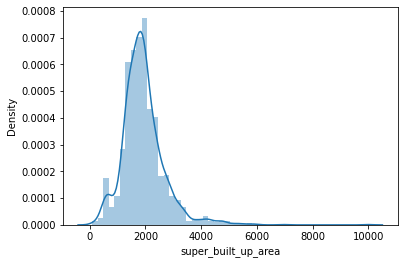

In [62]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:>

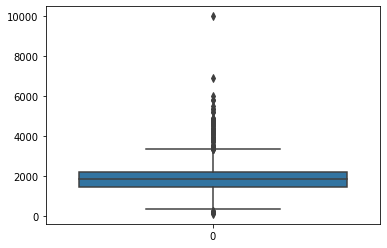

In [63]:
sns.boxplot(df['super_built_up_area'])

In [64]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [65]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


In [66]:
#they are correct, so we'll keep them in data

## builtup area

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

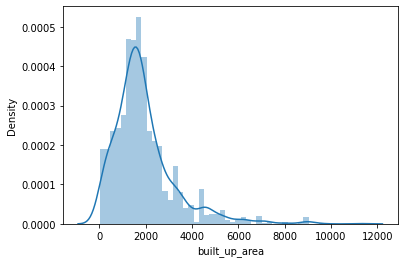

In [67]:
sns.distplot(df['built_up_area'])

<AxesSubplot:>

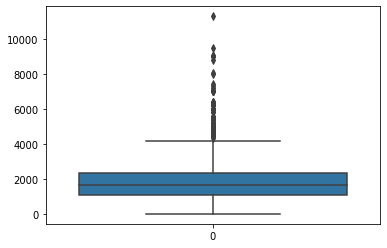

In [68]:
sns.boxplot(df['built_up_area'])

In [69]:
df['built_up_area'].describe()

count     1637.000000
mean      1921.359419
std       1366.741162
min         14.000000
25%       1120.000000
50%       1650.000000
75%       2367.000000
max      11286.000000
Name: built_up_area, dtype: float64

In [70]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


In [71]:
# this looks correct

## carpet area 

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

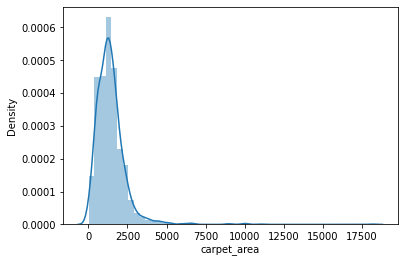

In [72]:
sns.distplot(df['carpet_area'])

<AxesSubplot:>

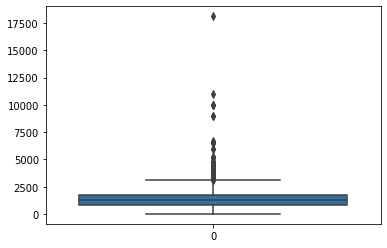

In [73]:
sns.boxplot(df['carpet_area'])

In [74]:
df['carpet_area'].describe()

count     1917.000000
mean      1424.716003
std       1022.313879
min         15.000000
25%        834.960000
50%       1294.000000
75%       1762.000000
max      18122.000000
Name: carpet_area, dtype: float64

In [75]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [76]:
# this looks correct

## luxury score

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

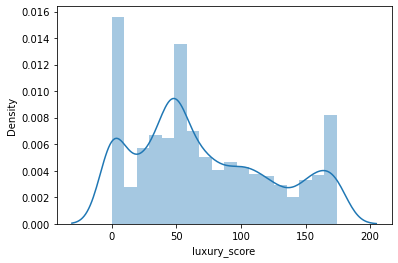

In [77]:
sns.distplot(df['luxury_score'])

<AxesSubplot:>

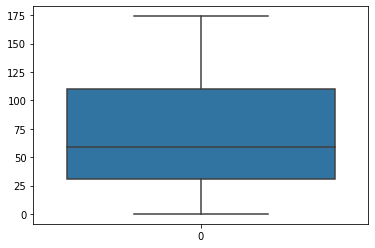

In [78]:
sns.boxplot(df['luxury_score'])

In [79]:
#luxury score doesnt have outliars

In [80]:
df.shape

(3693, 23)

## recalculating price per sqft

In [81]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [82]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

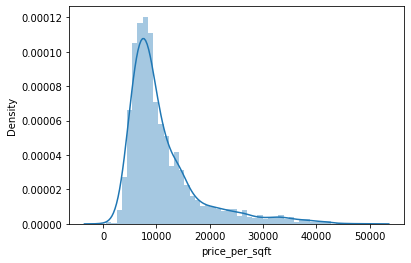

In [83]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:>

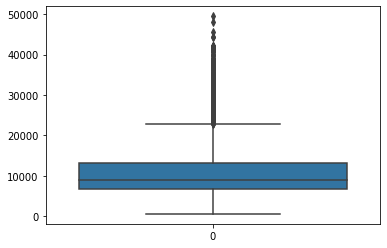

In [84]:
sns.boxplot(df['price_per_sqft'])

In [85]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
711,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
901,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1090,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1509,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
1526,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2040,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2130,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
3054,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3108,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0


In [86]:
#calculating area vs bedroom ratio as index 1509.. 9 bedrooms in 1125 sqft area??
#to understand if property contains lots of rooms in very small area

x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

198.0

In [87]:
df[(df['area']/df['bedRoom'])<198]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,house,independent,sector 105,1.20,10118.0,1186.0,Plot area 1185.51(110.14 sq.m.),6,2,1,2.0,North-West,Old Property,NaN,1185.51,NaN,0,0,0,0,0,0,9
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,1,7
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
99,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6,4,1,2.0,North,Undefined,NaN,990.00,NaN,0,0,0,0,0,0,0
215,house,bhawani enclave,sector 12,0.42,8235.0,510.0,Plot area 565(52.49 sq.m.)Carpet area: 510 sq....,3,3,0,2.0,East,New Property,NaN,NaN,510.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.00,NaN,0,0,0,0,0,0,0
3686,house,independent,sector 12,0.90,13333.0,675.0,Built Up area: 675 (62.71 sq.m.),4,4,0,2.0,NaN,Undefined,NaN,675.00,NaN,0,0,0,0,0,0,0
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,0,0
3774,house,independent,sector 28,0.45,10000.0,450.0,Built Up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,50.00,NaN,0,0,0,0,0,0,0


In [88]:
#there could be 2 possibility
#these are multi stories houses.. & person who uploaded data on 99acres
#has calculated total bedroom in the entir house & uploaded that inforamation

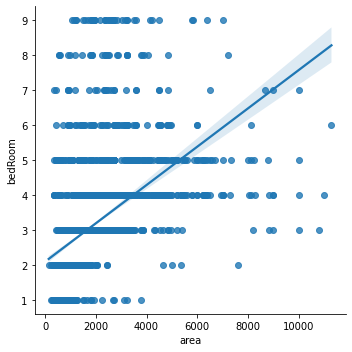

In [89]:
sns.lmplot(data=df,x='area', y='bedRoom')

In [90]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [91]:
df[df['area_room_ratio'] < 250]['bedRoom'].value_counts()

bedRoom
2    48
3    35
5    28
6    17
4    17
9    15
8    12
7     8
Name: count, dtype: int64

In [92]:
#removing propetries having room_area ratio < 100
df = df[df['area_room_ratio'] < 100]

In [93]:
#applying transformation wherever area_room_ratio < 250 & bedroom > 3
outliar_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] < 3)]

In [94]:
outliar_df['bedRoom'] = round(outliar_df['bedRoom']/outliar_df['floorNum'])

C:\Users\iampr\AppData\Local\Temp\ipykernel_8288\309812496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliar_df['bedRoom'] = round(outliar_df['bedRoom']/outliar_df['floorNum'])


In [95]:
df.update(outliar_df)

In [96]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [97]:
df[(df['area_room_ratio'] < 250 ) & (df['area_room_ratio'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
37,house,independent,sector 104,0.45,12162.0,370.0,Plot area 370(34.37 sq.m.)Carpet area: 1500 sq...,4,4,2,4.0,North,Moderately Old,NaN,NaN,1500.0,0,0,0,0,0,1,7,92.500000
229,house,rk excelo,sector 12,0.60,13333.0,450.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,5,3,2,3.0,North,Moderately Old,NaN,30.0,15.0,0,0,0,0,1,0,0,90.000000
247,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,2.0,East,Old Property,NaN,477.0,NaN,0,0,0,0,0,0,8,95.400000
751,house,independent,sector 17,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),1,2,0,3.0,NaN,Undefined,NaN,145.0,NaN,0,0,0,0,0,0,0,145.000000
1429,house,sector 38 rwa,sector 38,1.40,23932.0,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq....,8,8,3,4.0,East,Moderately Old,NaN,62.0,60.0,0,0,0,0,1,1,40,73.125000
1562,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,3.0,NaN,Old Property,NaN,360.0,NaN,0,0,0,0,0,0,0,72.000000
1580,house,independent,sector 8,0.49,11239.0,436.0,Plot area 360(33.45 sq.m.),6,3,2,3.0,East,Moderately Old,NaN,360.0,NaN,0,0,0,0,0,0,8,72.666667
1696,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5,3,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0,0,0,0,0,0,0,90.000000
1737,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,Plot area 360(33.45 sq.m.),4,3,2,3.0,East,Relatively New,NaN,360.0,NaN,0,0,0,0,0,0,0,90.000000
1773,house,rattan garden,sector 7,0.83,17585.0,472.0,Carpet area: 472 (43.85 sq.m.),5,3,2,3.0,East,Undefined,NaN,NaN,472.0,0,0,0,0,0,0,0,94.400000
